# Initial Review of the available data sets

This is an initial feasibility study into project MOCAP

## Load Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## Load Smoking Data Set

This data set should in theory correspond to the following technical paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5745355/ as cited on https://ifestos.cse.sc.edu/databases.php

![image.png](attachment:image.png)

In [2]:
!curl "https://ifestos.cse.sc.edu/datasets/smoking_data.tar.gz" > smoking_data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  159M  100  159M    0     0  4334k      0  0:00:37  0:00:37 --:--:-- 6207k 0     0   922k      0  0:02:57  0:00:02  0:02:55  923k0  3570k      0  0:00:45  0:00:06  0:00:39 4462k   0  3995k      0  0:00:40  0:00:29  0:00:11 3891k     0  4039k      0  0:00:40  0:00:32  0:00:08 4250k  4264k      0  0:00:38  0:00:36  0:00:02 5850k


In [3]:
# File should be 159M compressed, shows 169 in human readable -h option
!ls -lh smoking_data.tar.gz

-rw-r--r--  1 pierrejunca  staff   159M Nov 28 17:20 smoking_data.tar.gz


In [4]:
#Unpack the file, creates sub-directory smoking_data with csv files
!tar -xvf ./smoking_data.tar.gz

x smoking_data/smoking_input.csv
x smoking_data/
x smoking_data/smoking_targets.csv


In [5]:
#Housekeeping delete tar file
!rm smoking_data.tar.gz

In [60]:
#file has no header

X_path = os.path.join('smoking_data','smoking_input.csv')
y_path = os.path.join('smoking_data','smoking_targets.csv')

print(X_path,y_path)

X_data=pd.read_csv(X_path, header=None)
y_data=pd.read_csv(y_path, header=None)

smoking_data/smoking_input.csv smoking_data/smoking_targets.csv


In [61]:
X_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.2175,-9.2

In [62]:
X_data.shape

(351530, 300)

In [63]:
y_data.head(5)

,0
0,1
1,1
2,1
3,1
4,1


In [64]:
y_data.rename(columns={ df.columns[0]: "Target" }, inplace = True)  

In [65]:
y_data

,Target
0,1
1,1
2,1
3,1
4,1
...,...
351525,0
351526,0
351527,0
351528,0


In [66]:
df = pd.concat([X_data, y_data], axis=1)

In [67]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN,1
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.

In [68]:
df[299].fillna(df[298], inplace = True)
df[199].fillna(df[198], inplace = True)
df[99].fillna(df[98], inplace = True)

In [69]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,5.4334,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,-6.9002,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,4.21430,1
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,

In [71]:
df.isnull().sum().sum()

0

In [26]:
df_nan = df[df.isnull().any(axis=1)]
df_nan

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Target
0,4.857800,4.855500,4.529700,4.10980,3.740600,3.24810,2.96290,2.75890,2.695800,2.183100,2.04270,0.95076,-0.46114,-1.444200,-2.3915,-3.1463,-3.89330,-4.5609,-5.2918,-6.15730,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.84030,-4.48920,-4.4471,-4.1146,-3.51660,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.48620,3.47780,4.11620,4.74010,6.03530,5.43340,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.7121,-8.8829,-10.2530,-11.3410,-10.1280,-8.3524,-7.8472,-7.4694,-6.6518,-6.1294,-5.6846,-5.4560,-5.7814,-5.7924,-4.7064,-3.7092,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.85590,-1.83020,-1.97870,-1.80480,-1.76340,-1.15800,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.73150,-1.645000,-1.67450,-1.57730,-1.51460,-1.56100,-1.71370,-1.47590,-0.89913,-0.80832,-1.00880,-1.05740,-1.35760,-1.36530,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.05290,-0.29608,-0.932360,-2.59340,-4.6809,-7.3138,-10.1480,-11.4870,-10.0920,-9.1042,-9.8578,-9.6109,-7.9666,-8.0019,-9.3851,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.0848,5.8356,5.4543,4.89560,4.77730,4.55750,4.40640,5.48530,6.47550,7.090800,7.46620,6.94230,6.03590,5.13600,4.031000,3.43240,2.6739,2.0811,2.1131,2.7323,3.6568,3.69220,4.4619,4.15170,4.00640,4.43650,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.53780,3.85370,4.30000,3.88540,2.703100,3.40150,4.39010,4.17830,5.400300,5.72080,5.92460,6.48200,6.38590,5.679300,5.24790,5.53210,5.31640,4.84220,5.33490,4.125300,4.61110,4.97470,4.939100,4.21430,NaN,1
1,5.322300,5.313100,4.645900,4.25280,3.636600,3.07770,2.63030,2.44620,1.965300,1.460700,-0.28283,-1.64670,-2.78100,-3.569200,-3.7017,-4.1057,-4.43590,-4.6899,-5.0766,-5.77580,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2

In [28]:
Xx_nan=df_nan.iloc[0:,:100]
Xy_nan=df_nan.iloc[0:,100:200]
Xz_nan=df_nan.iloc[0:,200:300]

print(Xx_nan.shape, Xy_nan.shape, Xz_nan.shape)

(19950, 100) (19950, 100) (19950, 100)


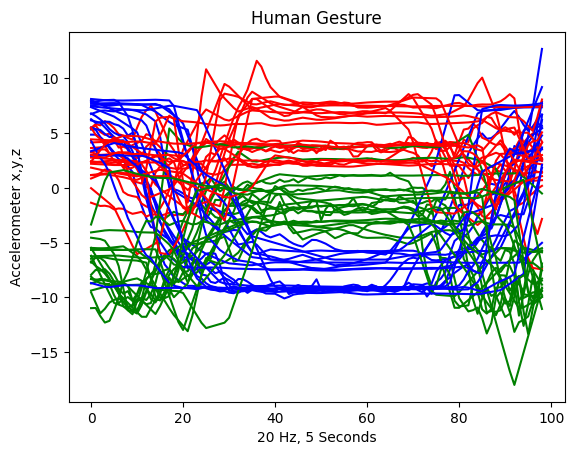

In [29]:
hz=np.arange(0,100)

for i in range (0,20):
    plt.plot(hz,Xx_nan.iloc[i],'b', label="X" )
    plt.plot(hz,Xy_nan.iloc[i],'g', label="Y" )
    plt.plot(hz,Xz_nan.iloc[i],'r', label="Z" )
    plt.title("Human Gesture")
    plt.xlabel("20 Hz, 5 Seconds")
    plt.ylabel("Accelerometer x,y,z")

plt.show;

## Feature Exploration

The data analyzed in this study consisted of the three-dimensional accelerometer data collected from the Asus Zenwatch (first generation). The accelerometer onboard the Asus Zenwatch is triaxial and therefore capable of recording acceleration in three principal axes x, y, and z.

During this investigation, a fixed sampling frequency of 20 Hz was used.

In our data, puff duration never exceeded 5 seconds in length. Therefore, the input to the artificial neural network’s gesture recognition system consisted of a set of accelerometer data that spanned 5 seconds of observation sampled at 20 Hz (100 points of data). Each set of data included x, y, and z components of the accelerometer, which necessitated an artificial neural network architecture with 300 input points and one output point

In [35]:
print(X_data.shape)
X_data.head()

(351530, 300)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.2175,-9.2

In [36]:
X_data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
           dtype='int64', length=300)

In [37]:
X_data.isnull().sum()

0          0
1          0
2          0
3          0
4          0
       ...  
295        0
296        0
297        0
298        0
299    19950
Length: 300, dtype: int64

There are some NAN values, lets just drop them for now from both the input and target data sets

In [38]:
print(X_data.shape,y_data.shape)

#Create an index List of rows containing NaN values
nan_rows=np.unique(list(np.where(X_data.isnull())))

X_data.drop(nan_rows, axis=0, inplace=True)
y_data.drop(nan_rows, axis=0, inplace=True)

print(X_data.shape,y_data.shape)

(351530, 300) (351530, 1)
(331578, 300) (331578, 1)


**Trust but verify**

In [39]:
X_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Length: 300, dtype: int64

The observations are for 5 seconds at 20Hz = 100 data points for the 3 acceleromters (100 X 3 = 300 data points). Let's splice the 300 columns/datapoints backing into the individual x,y,z set of data points

In [40]:
Xx=X_data.iloc[0:,:100]
Xy=X_data.iloc[0:,100:200]
Xz=X_data.iloc[0:,200:300]

print(Xx.shape, Xy.shape, Xz.shape)

(331578, 100) (331578, 100) (331578, 100)


Lets create a simple plot for a simple visual comparison of the pattern for the first 5 observations

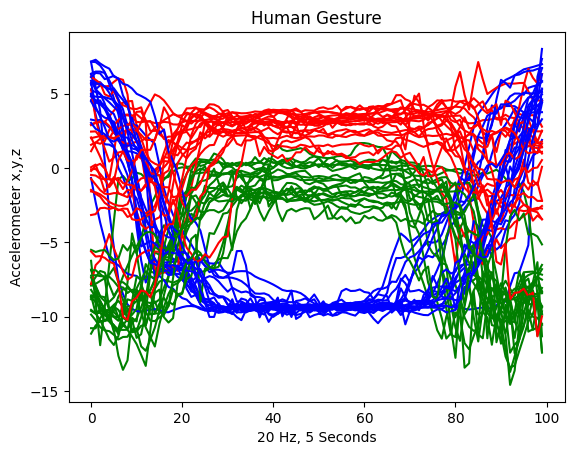

In [41]:
hz=np.arange(0,100)

for i in range (0,20):
    plt.plot(hz,Xx.iloc[i],'b', label="X" )
    plt.plot(hz,Xy.iloc[i],'g', label="Y" )
    plt.plot(hz,Xz.iloc[i],'r', label="Z" )
    plt.title("Human Gesture")
    plt.xlabel("20 Hz, 5 Seconds")
    plt.ylabel("Accelerometer x,y,z")

plt.show;

In [42]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

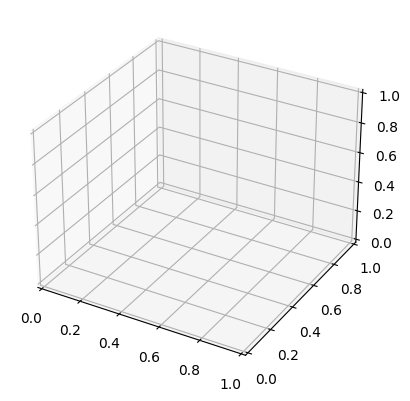

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Error in callback <function _draw_all_if_interactive at 0x11f1811b0> (for post_execute):


KeyboardInterrupt: 

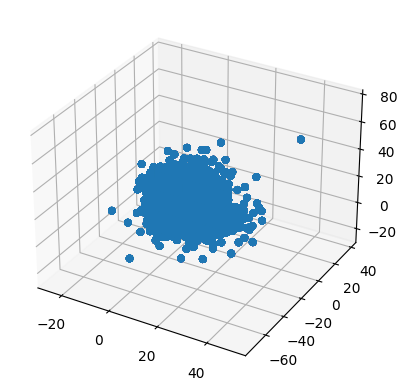

In [46]:
ax = plt.axes(projection='3d')


ax.scatter3D(Xx, Xy, Xz);

## Target Exploration

In [ ]:
print(y_data.shape)
y_data.sample(5)

(331578, 1)


,0
309900,0
314141,0
63502,1
326639,0
61134,1


Check the balance in classes

In [ ]:
y_data.value_counts()

0    174080
1    157498
dtype: int64